# EJERCICIO 2. La empresa AZ elabora el producto AAA y lo vende en un mercado competitivo. El precio del producto en el mercado (P) actualmente es de RD$300. En base a este y los datos de la tabla siguiente: 
#### **2.1** Complete los datos de la tabla. El costo fijo total (CFT) es igual a 200. 
#### **2.2** Para el precio del mercado determine el nivel de producción que maximiza los beneficios e calcule el monto de los beneficios.
#### **2.3** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes:
- **2.3.1** Si el precio disminuye a RD$90.
- **2.3.2** Si el precio aumenta a RD$550.
#### **2.4** En la tabla siguiente indique los rangos de precios en los que la empresa obtiene los resultados que refiere la primera columna.
#### **2.5** Construya la tabla de oferta individual para esta empresa y grafique su curva de oferta individual. 
#### **2.6** Calcule el excedente agregado del productor de esta empresa para los precios indicados en las partes 2.2 y 2.3. Para la parte  2.2  calcule  también  el  excedente  del  productor  para  cada  unidad  del  producto  y  compruebe  que  la  sumatoria  es igual al excedente agregado del productor.


#### Funciones a utilizar:

In [152]:
import pandas as pd
import numpy as np

def maximizar_ganancias(df, es_empresa=True):
    # Verificar si la columna es 'q' (empresa) o 'Q' (mercado)
    if 'q' in df.columns:
        columna_q = 'q'
    elif 'Q' in df.columns:
        columna_q = 'Q'
    else:
        raise KeyError("No se encontró la columna 'q' o 'Q' en el DataFrame.")

    # Calcular el beneficio (π) y el Beneficio Marginal (BM)
    df['π'] = df['IT'] - df['CT']
    df['BM'] = df['π'].diff() / df[columna_q].diff()

    # Encontrar todos los puntos donde BM es 0
    df_zeros = df[df['BM'] == 0]

    if not df_zeros.empty:
        # Seleccionar el nivel con el mayor beneficio (π) entre los ceros
        nivel_max = df_zeros.loc[df_zeros['π'].idxmax(), columna_q]
        beneficio_max = df_zeros['π'].max()
    else:
        # Si no hay BM cero, tomar el nivel con el máximo beneficio
        nivel_max = df.loc[df['π'].idxmax(), columna_q]
        beneficio_max = df['π'].max()

    return nivel_max, beneficio_max

def next_line(n=1):
    for i in range(n):
        print()
        
def llenar_tabla_costos(datos: dict, precio: int):
    # Crear el DataFrame con los datos proporcionados
    df = pd.DataFrame(datos)

    # Asignar el precio
    p = precio

    # Iterar sobre las filas (a partir de la fila 1)
    for i in range(1, len(df)):
        print(f"\nCálculos para Q = {df.loc[i, 'Q']}:")

        # Ingresos Totales (IT)
        df.loc[i, 'IT'] = round(df.loc[i, 'Q'] * p, 2)
        print(f"IT = Q * p = {df.loc[i, 'Q']} * {p} = {df.loc[i, 'IT']}")

        # Ingreso Marginal (IM) = ΔIT / ΔQ
        df.loc[i, 'IM'] = round((df.loc[i, 'IT'] - df.loc[i - 1, 'IT']) / (df.loc[i, 'Q'] - df.loc[i - 1, 'Q']), 2)
        print(f"IM = ΔIT / ΔQ = ({df.loc[i, 'IT']} - {df.loc[i - 1, 'IT']}) / ({df.loc[i, 'Q']} - {df.loc[i - 1, 'Q']}) = {df.loc[i, 'IM']}")

        # Costo Total (CT) = CFT + CVT
        df.loc[i, 'CT'] = round(df.loc[i, 'CFT'] + df.loc[i, 'CVT'], 2)
        print(f"CT = CFT + CVT = {df.loc[i, 'CFT']} + {df.loc[i, 'CVT']} = {df.loc[i, 'CT']}")

        # Costo Total Medio (CTMe) = CT / Q
        if df.loc[i, 'Q'] != 0:
            df.loc[i, 'CTMe'] = round(df.loc[i, 'CT'] / df.loc[i, 'Q'], 2)
            print(f"CTMe = CT / Q = {df.loc[i, 'CT']} / {df.loc[i, 'Q']} = {df.loc[i, 'CTMe']}")
        else:
            df.loc[i, 'CTMe'] = np.nan
        
        # Costo Fijo Medio (CFMe) = CFT / Q
        if df.loc[i, 'Q'] != 0:
            df.loc[i, 'CFMe'] = round(df.loc[i, 'CFT'] / df.loc[i, 'Q'], 2)
            print(f"CFMe = CFT / Q = {df.loc[i, 'CFT']} / {df.loc[i, 'Q']} = {df.loc[i, 'CFMe']}")
        else:
            df.loc[i, 'CFMe'] = np.nan

        # Costo Variable Medio (CVMe) = CVT / Q
        if df.loc[i, 'Q'] != 0:
            df.loc[i, 'CVMe'] = round(df.loc[i, 'CVT'] / df.loc[i, 'Q'], 2)
            print(f"CVMe = CVT / Q = {df.loc[i, 'CVT']} / {df.loc[i, 'Q']} = {df.loc[i, 'CVMe']}")
        else:
            df.loc[i, 'CVMe'] = np.nan

        # Costo Medio (CMe) = CT / Q
        if df.loc[i, 'Q'] != 0:
            df.loc[i, 'CMe'] = round(df.loc[i, 'CT'] / df.loc[i, 'Q'], 2)
            print(f"CMe = CT / Q = {df.loc[i, 'CT']} / {df.loc[i, 'Q']} = {df.loc[i, 'CMe']}")
        else:
            df.loc[i, 'CMe'] = np.nan

        # Costo Marginal (CM) = ΔCT / ΔQ
        df.loc[i, 'CM'] = round((df.loc[i, 'CT'] - df.loc[i - 1, 'CT']) / (df.loc[i, 'Q'] - df.loc[i - 1, 'Q']), 2)
        print(f"CM = ΔCT / ΔQ = ({df.loc[i, 'CT']} - {df.loc[i - 1, 'CT']}) / ({df.loc[i, 'Q']} - {df.loc[i - 1, 'Q']}) = {df.loc[i, 'CM']}")

        # Beneficio Marginal (BM) = IM - CM
        df.loc[i, 'BM'] = round(df.loc[i, 'IM'] - df.loc[i, 'CM'], 2)
        print(f"BM = IM - CM = {df.loc[i, 'IM']} - {df.loc[i, 'CM']} = {df.loc[i, 'BM']}")

        # Beneficio (π) = IT - CT
        df.loc[i, 'π'] = round(df.loc[i, 'IT'] - df.loc[i, 'CT'], 2)
        print(f"π = IT - CT = {df.loc[i, 'IT']} - {df.loc[i, 'CT']} = {df.loc[i, 'π']}")
        next_line()

    return df


#### **2.1** Complete los datos de la tabla. El costo fijo total (CFT) es igual a 200. 

In [153]:
import pandas as pd
import numpy as np

data = {
    'q': range(0, 11),
    'IT': [np.nan] * 11,
    'IM': [np.nan] * 11,
    'CFT': [200] * 11,
    'CVT': [0, 150, 240, 300, 350, 440, 550, 700, 950, 1300, 1850],
    'CT': [np.nan] * 11,
    'CFMe': [np.nan] * 11,
    'CVMe': [np.nan] * 11,
    'CTMe': [np.nan] * 11,
    'CM': [np.nan] * 11,
    'BM': [np.nan] * 11,
    'π': [np.nan] * 11,   
}

df = pd.DataFrame(data)

# Precio
p = 300

df['IT'] = df['q'] * p
df['IM'] = (df['IT'].diff()) / (df['q'].diff())
df['CT'] = df['CFT'] + df['CVT']
df['CFMe'] = df['CFT'] / df['q'].replace(0, np.nan)
df['CVMe'] = df['CVT'] / df['q'].replace(0, np.nan)
df['CTMe'] = df['CT'] / df['q'].replace(0, np.nan)
df['CM'] = df['CT'].diff() / df['q'].diff()
df['BM'] = df['IM'] - df['CM']
df['π'] = df['IT'] - df['CT']

df['CFMe'] = round(df['CFMe'], 1)
df['CVMe'] = round(df['CVMe'], 1)
df['CTMe'] = round(df['CTMe'], 1)

print(f'{df}')
df.to_excel('Tabla_2.xlsx', index=False)


     q    IT     IM  CFT   CVT    CT   CFMe   CVMe   CTMe     CM     BM     π
0    0     0    NaN  200     0   200    NaN    NaN    NaN    NaN    NaN  -200
1    1   300  300.0  200   150   350  200.0  150.0  350.0  150.0  150.0   -50
2    2   600  300.0  200   240   440  100.0  120.0  220.0   90.0  210.0   160
3    3   900  300.0  200   300   500   66.7  100.0  166.7   60.0  240.0   400
4    4  1200  300.0  200   350   550   50.0   87.5  137.5   50.0  250.0   650
5    5  1500  300.0  200   440   640   40.0   88.0  128.0   90.0  210.0   860
6    6  1800  300.0  200   550   750   33.3   91.7  125.0  110.0  190.0  1050
7    7  2100  300.0  200   700   900   28.6  100.0  128.6  150.0  150.0  1200
8    8  2400  300.0  200   950  1150   25.0  118.8  143.8  250.0   50.0  1250
9    9  2700  300.0  200  1300  1500   22.2  144.4  166.7  350.0  -50.0  1200
10  10  3000  300.0  200  1850  2050   20.0  185.0  205.0  550.0 -250.0   950


#### **2.2** Para el precio del mercado determine el nivel de producción que maximiza los beneficios e calcule el monto de los beneficios.

In [154]:
nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max}")

El nivel de producción que maximiza las ganancias es: 8
El monto del beneficio máximo es: 1250


#### **2.3.1** Si el precio disminuye a RD$90.

In [155]:
data = {
    'q': range(0, 11),
    'IT': [np.nan] * 11,
    'IM': [np.nan] * 11,
    'CFT': [200] * 11,
    'CVT': [0, 150, 240, 300, 350, 440, 550, 700, 950, 1300, 1850],
    'CT': [np.nan] * 11,
    'CFMe': [np.nan] * 11,
    'CVMe': [np.nan] * 11,
    'CTMe': [np.nan] * 11,
    'CM': [np.nan] * 11,
    'BM': [np.nan] * 11,
    'π': [np.nan] * 11,   
}

df = pd.DataFrame(data)

# Precio
p = 90

df['IT'] = df['q'] * p
df['IM'] = (df['IT'].diff()) / (df['q'].diff())
df['CT'] = df['CFT'] + df['CVT']
df['CFMe'] = df['CFT'] / df['q'].replace(0, np.nan)
df['CVMe'] = df['CVT'] / df['q'].replace(0, np.nan)
df['CTMe'] = df['CT'] / df['q'].replace(0, np.nan)
df['CM'] = df['CT'].diff() / df['q'].diff()
df['BM'] = df['IM'] - df['CM']
df['π'] = df['IT'] - df['CT']

df['CFMe'] = round(df['CFMe'], 1)
df['CVMe'] = round(df['CVMe'], 1)
df['CTMe'] = round(df['CTMe'], 1)

print(f'{df}\n')

nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max}")

     q   IT    IM  CFT   CVT    CT   CFMe   CVMe   CTMe     CM     BM     π
0    0    0   NaN  200     0   200    NaN    NaN    NaN    NaN    NaN  -200
1    1   90  90.0  200   150   350  200.0  150.0  350.0  150.0  -60.0  -260
2    2  180  90.0  200   240   440  100.0  120.0  220.0   90.0    0.0  -260
3    3  270  90.0  200   300   500   66.7  100.0  166.7   60.0   30.0  -230
4    4  360  90.0  200   350   550   50.0   87.5  137.5   50.0   40.0  -190
5    5  450  90.0  200   440   640   40.0   88.0  128.0   90.0    0.0  -190
6    6  540  90.0  200   550   750   33.3   91.7  125.0  110.0  -20.0  -210
7    7  630  90.0  200   700   900   28.6  100.0  128.6  150.0  -60.0  -270
8    8  720  90.0  200   950  1150   25.0  118.8  143.8  250.0 -160.0  -430
9    9  810  90.0  200  1300  1500   22.2  144.4  166.7  350.0 -260.0  -690
10  10  900  90.0  200  1850  2050   20.0  185.0  205.0  550.0 -460.0 -1150

El nivel de producción que maximiza las ganancias es: 5
El monto del beneficio máximo e

#### **2.3.2** Si el precio aumenta a RD$550.

In [156]:
data = {
    'q': range(0, 11),
    'IT': [np.nan] * 11,
    'IM': [np.nan] * 11,
    'CFT': [200] * 11,
    'CVT': [0, 150, 240, 300, 350, 440, 550, 700, 950, 1300, 1850],
    'CT': [np.nan] * 11,
    'CFMe': [np.nan] * 11,
    'CVMe': [np.nan] * 11,
    'CTMe': [np.nan] * 11,
    'CM': [np.nan] * 11,
    'BM': [np.nan] * 11,
    'π': [np.nan] * 11,   
}

df = pd.DataFrame(data)

# Precio
p = 550

df['IT'] = df['q'] * p
df['IM'] = (df['IT'].diff()) / (df['q'].diff())
df['CT'] = df['CFT'] + df['CVT']
df['CFMe'] = df['CFT'] / df['q'].replace(0, np.nan)
df['CVMe'] = df['CVT'] / df['q'].replace(0, np.nan)
df['CTMe'] = df['CT'] / df['q'].replace(0, np.nan)
df['CM'] = df['CT'].diff() / df['q'].diff()
df['BM'] = df['IM'] - df['CM']
df['π'] = df['IT'] - df['CT']

df['CFMe'] = round(df['CFMe'], 1)
df['CVMe'] = round(df['CVMe'], 1)
df['CTMe'] = round(df['CTMe'], 1)

print(f'{df}\n')

nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max}")

     q    IT     IM  CFT   CVT    CT   CFMe   CVMe   CTMe     CM     BM     π
0    0     0    NaN  200     0   200    NaN    NaN    NaN    NaN    NaN  -200
1    1   550  550.0  200   150   350  200.0  150.0  350.0  150.0  400.0   200
2    2  1100  550.0  200   240   440  100.0  120.0  220.0   90.0  460.0   660
3    3  1650  550.0  200   300   500   66.7  100.0  166.7   60.0  490.0  1150
4    4  2200  550.0  200   350   550   50.0   87.5  137.5   50.0  500.0  1650
5    5  2750  550.0  200   440   640   40.0   88.0  128.0   90.0  460.0  2110
6    6  3300  550.0  200   550   750   33.3   91.7  125.0  110.0  440.0  2550
7    7  3850  550.0  200   700   900   28.6  100.0  128.6  150.0  400.0  2950
8    8  4400  550.0  200   950  1150   25.0  118.8  143.8  250.0  300.0  3250
9    9  4950  550.0  200  1300  1500   22.2  144.4  166.7  350.0  200.0  3450
10  10  5500  550.0  200  1850  2050   20.0  185.0  205.0  550.0    0.0  3450

El nivel de producción que maximiza las ganancias es: 10
El mon

#### **2.4** En la tabla siguiente indique los rangos de precios en los que la empresa obtiene los resultados que refiere la primera columna.

In [157]:
import pandas as pd
import numpy as np

# Datos iniciales
data = {
    'Resultados': [
        'Beneficios', 
        'Pérdidas', 
        'Beneficio nulo', 
        'Opera con pérdidas', 
        'Precio de cierre', 
        'Precio donde debe cerrar'
    ],
    'Rangos de precios': [''] * 6,
    'Justificación': [''] * 6
}

df = pd.DataFrame(data)

# Leer la tabla de Excel
df_2 = pd.read_excel('Tabla_2.xlsx')

# Calcular el precio mínimo y máximo de CTMe
min_ctme = round(df_2['CTMe'].min(), 2)
max_ctme = round(df_2['CTMe'].max(), 2)

# Calcular el precio mínimo y máximo de CVMe
min_cvme = round(df_2['CVMe'].min(), 2)
max_cvme = round(df_2['CVMe'].max(), 2)

# Asignar rangos de precios a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Rangos de precios'] = f'P > {min_ctme}'
df.loc[df['Resultados'] == 'Pérdidas', 'Rangos de precios'] = f'P < {min_ctme}'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Rangos de precios'] = f'P = {min_ctme}'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Rangos de precios'] = f'{min_cvme} < P < {min_ctme}'
df.loc[df['Resultados'] == 'Precio de cierre', 'Rangos de precios'] = f'P = {min_cvme}'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Rangos de precios'] = f'P < {min_cvme}'

# Asignar Justificación a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Justificación'] = f'P > CTMe Mínimo'
df.loc[df['Resultados'] == 'Pérdidas', 'Justificación'] = f'P < CTMe Mínimo'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Justificación'] = f'P = CTMe Mínimo'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Justificación'] = f'CVMe Mínimo < P < CTME Mínimo'
df.loc[df['Resultados'] == 'Precio de cierre', 'Justificación'] = f'P = CVMe Mínimo'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Justificación'] = f'P < CVMe Mínimo'

df_styled = df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

df_styled


,Resultados,Rangos de precios,Justificación
0,Beneficios,P > 125.0,P > CTMe Mínimo
1,Pérdidas,P < 125.0,P < CTMe Mínimo
2,Beneficio nulo,P = 125.0,P = CTMe Mínimo
3,Opera con pérdidas,87.5 < P < 125.0,CVMe Mínimo < P < CTME Mínimo
4,Precio de cierre,P = 87.5,P = CVMe Mínimo
5,Precio donde debe cerrar,P < 87.5,P < CVMe Mínimo


#### **2.5** Construya la tabla de oferta individual para esta empresa y grafique su curva de oferta individual. 

,P=CM,q
1,150,1
2,90,2
3,60,3
4,50,4
5,90,5
6,110,6
7,150,7
8,250,8
9,350,9
10,550,10


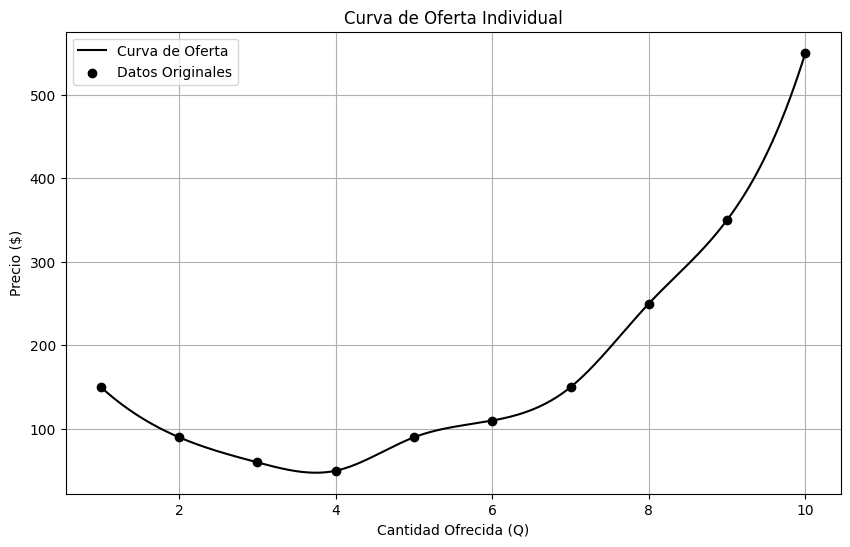

In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline
from IPython.display import display

# Leer la tabla de Excel
tabla = pd.read_excel('Tabla_2.xlsx')

# Limpiar datos: reemplazar inf y eliminar filas con NaN
tabla = tabla.replace([np.inf, -np.inf], np.nan)
tabla = tabla.dropna(subset=['q', 'CM'])

# Redondear los valores a enteros para evitar decimales
tabla['CM'] = tabla['CM'].round().astype(int)
tabla['q'] = tabla['q'].round().astype(int)

# Crear DataFrame con datos seleccionados
data = {
    'P=CM': tabla['CM'],
    'q': tabla['q']
}

df = pd.DataFrame(data)

# Aplicar estilos al DataFrame
df_styled = df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

# Mostrar el DataFrame estilizado
display(df_styled)

# Extraer datos
q = tabla['q']
CM = tabla['CM']

# Interpolación para suavizar la línea de conexión entre los puntos
spline = make_interp_spline(q, CM, k=3)  # Cubic spline interpolation
q_spline = np.linspace(min(q), max(q), 500)  # Más puntos para suavizar la curva
CM_spline = spline(q_spline)

# Crear el gráfico
plt.figure(figsize=(10, 6))

# Traza la curva suavizada
plt.plot(q_spline, CM_spline, color='k', label='Curva de Oferta')

# Traza los puntos originales
plt.scatter(q, CM, color='k', zorder=5, label='Datos Originales')

# Ajustar el formato de las etiquetas del eje
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

# Añadir etiquetas y título
plt.xlabel('Cantidad Ofrecida (Q)')
plt.ylabel('Precio ($)')
plt.title('Curva de Oferta Individual')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


#### **2.6** Calcule el excedente agregado del productor de esta empresa para los precios indicados en las partes 2.2 y 2.3. Para la parte  2.2  calcule  también  el  excedente  del  productor  para  cada  unidad  del  producto  y  compruebe  que  la  sumatoria  es igual al excedente agregado del productor.

In [159]:
import pandas as pd
import numpy as np

# Leer la tabla de Excel
tabla_2 = pd.read_excel('Tabla_2.xlsx')

# Crear el nuevo DataFrame
data = {
    'q': range(1, 11),  # Crear un rango de 1 a la longitud de tabla_2
    'CM': tabla_2['CM'][1:11],
    'Ep = P-CM': np.nan  # Inicializar con NaN
}

df = pd.DataFrame(data)

# Precio indicado en el 2.2, 2.3.1 y 2.3.2
precios = [300, 90, 550]
ejercicios = ['2.2', '2.3.1', '2.3.2']

# Iterar sobre los precios y ejercicios
for i, ejercicio in enumerate(ejercicios):
    print(f'Excedente Agregado del Productor en el ejercicio {ejercicio}')
    
    # Calcular el excedente del productor
    resultados = precios[i] - df['CM']
    
    # Crear el texto del procedimiento
    procedimiento = [f'={precios[i]}-{cm}={resultado:.2f}' for cm, resultado in zip(df['CM'], resultados)]
    
    # Asignar los resultados y el procedimiento al DataFrame
    df['Ep = P-CM'] = procedimiento
    
    # Guardar el resultado en una variable
    resultado_variable = resultados
    
    # Crear el DataFrame estilizado sin índices y con formato
    df_styled = df.style.format({
        'CM': '{:.2f}',  # Formatear 'CM' con 2 decimales
        'Ep = P-CM': '{}'  # Mostrar el texto tal cual
    }).set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).hide(axis='index')
    
    if ejercicio == '2.2':
        # Mostrar el DataFrame estilizado
        display(df_styled)
    
    if ejercicio != '2.2':
        for proceso in procedimiento:
            print(proceso)
        
    
    # Imprimir el resultado variable
    
    print(f'Excedente variable para el ejercicio {ejercicio}: {sum(resultado_variable.tolist())}')
    next_line()

Excedente Agregado del Productor en el ejercicio 2.2


q,CM,Ep = P-CM
1,150.00,=300-150.0=150.00
2,90.00,=300-90.0=210.00
3,60.00,=300-60.0=240.00
4,50.00,=300-50.0=250.00
5,90.00,=300-90.0=210.00
6,110.00,=300-110.0=190.00
7,150.00,=300-150.0=150.00
8,250.00,=300-250.0=50.00
9,350.00,=300-350.0=-50.00
10,550.00,=300-550.0=-250.00


Excedente variable para el ejercicio 2.2: 1150.0

Excedente Agregado del Productor en el ejercicio 2.3.1
=90-150.0=-60.00
=90-90.0=0.00
=90-60.0=30.00
=90-50.0=40.00
=90-90.0=0.00
=90-110.0=-20.00
=90-150.0=-60.00
=90-250.0=-160.00
=90-350.0=-260.00
=90-550.0=-460.00
Excedente variable para el ejercicio 2.3.1: -950.0

Excedente Agregado del Productor en el ejercicio 2.3.2
=550-150.0=400.00
=550-90.0=460.00
=550-60.0=490.00
=550-50.0=500.00
=550-90.0=460.00
=550-110.0=440.00
=550-150.0=400.00
=550-250.0=300.00
=550-350.0=200.00
=550-550.0=0.00
Excedente variable para el ejercicio 2.3.2: 3650.0



# **EJERCICIO  3.**  La  empresa  VIP,  que  opera  en  un  mercado  competitivo,  produce  el  bien  Y  cuyo  precio  de  venta  (P)  en  la actualidad  es  de  110  RD$/unidad,  a  este  precio  la  empresa  puede  vender  toda  su  producción.  En  base  a  este  y  los  datos  que ofrece la tabla siguiente: 
#### **3.1** Complete los datos de esta tabla. El costo fijo total (CFT) es igual a 100.  
#### **3.2** Para el precio del mercado determine el nivel de producción que maximiza los beneficios y calcule el monto de los beneficios.
#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.1**) Si el precio aumenta a RD$130.
- **3.3.2**) Si el precio disminuye a RD$70.  
#### **3.4**  Grafique  jutas  las  curvas  de  CVMe,  CTMe  y  CM.  En  esta  gráfica  represente  las  curvas  de  IM  y  los  respectivos niveles de producción para los precios indicados en las partes 3.2 y 3.3. 
#### **3.5** En la tabla siguiente  y en la gráfica de la parte  3.4 indique los rangos de precios en los que la empresa  obtiene los resultados que refiere la primera columna.
#### **3.6** Construya una tabla de oferta individual para esta empresa y grafique su curva de oferta individual. 
#### **3.7** Calcule el excedente agregado del productor de esta empresa para los precios indicados en las partes E.2 y E.3. Para la parte  E.2  calcule  también  el  excedente  del  productor  para  cada  unidad  del  producto  y  compruebe  que  la  sumatoria  es igual al excedente agregado del productor.

#### **3.1** Complete los datos de esta tabla. El costo fijo total (CFT) es igual a 100. 

In [160]:
import pandas as pd
import numpy as np

data = {
    'Q': range(13),
    'IT': np.nan*13,
    'IM': np.nan*13,
    'CFT': 100,
    'CVT': [0, 60.5, 114.2, 164.5, 219.4, 279.2, 348.7, 435.1, 544.3, 673.4, 834, 1024.7, 1255.5],
    'CT': np.nan*13,
    'CTMe': np.nan*13,
    'CFMe': np.nan*13,
    'CVMe': np.nan*13,
    'CMe': np.nan*13,
    'CM': np.nan*13,
    'BM': np.nan*13,
    'π': np.nan*13
}

precio = 110
df = llenar_tabla_costos(data, precio)

print(df)

df.to_excel('Tabla_3.xlsx', index=False)


Cálculos para Q = 1:
IT = Q * p = 1 * 110 = 110.0
IM = ΔIT / ΔQ = (110.0 - nan) / (1 - 0) = nan
CT = CFT + CVT = 100 + 60.5 = 160.5
CTMe = CT / Q = 160.5 / 1 = 160.5
CFMe = CFT / Q = 100 / 1 = 100.0
CVMe = CVT / Q = 60.5 / 1 = 60.5
CMe = CT / Q = 160.5 / 1 = 160.5
CM = ΔCT / ΔQ = (160.5 - nan) / (1 - 0) = nan
BM = IM - CM = nan - nan = nan
π = IT - CT = 110.0 - 160.5 = -50.5


Cálculos para Q = 2:
IT = Q * p = 2 * 110 = 220.0
IM = ΔIT / ΔQ = (220.0 - 110.0) / (2 - 1) = 110.0
CT = CFT + CVT = 100 + 114.2 = 214.2
CTMe = CT / Q = 214.2 / 2 = 107.1
CFMe = CFT / Q = 100 / 2 = 50.0
CVMe = CVT / Q = 114.2 / 2 = 57.1
CMe = CT / Q = 214.2 / 2 = 107.1
CM = ΔCT / ΔQ = (214.2 - 160.5) / (2 - 1) = 53.7
BM = IM - CM = 110.0 - 53.7 = 56.3
π = IT - CT = 220.0 - 214.2 = 5.8


Cálculos para Q = 3:
IT = Q * p = 3 * 110 = 330.0
IM = ΔIT / ΔQ = (330.0 - 220.0) / (3 - 2) = 110.0
CT = CFT + CVT = 100 + 164.5 = 264.5
CTMe = CT / Q = 264.5 / 3 = 88.17
CFMe = CFT / Q = 100 / 3 = 33.33
CVMe = CVT / Q = 164.5 / 

#### **3.2** Para el precio del mercado determine el nivel de producción que maximiza los beneficios y calcule el monto de los beneficios.

In [161]:
import pandas as pd
import numpy as np

nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max:.2f}")

El nivel de producción que maximiza las ganancias es: 8
El monto del beneficio máximo es: 235.70


#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.1**) Si el precio aumenta a RD$130.
- **3.3.2**) Si el precio disminuye a RD$70.

In [162]:
import pandas as pd
import numpy as np
from IPython.display import Markdown, display

data = {
    'Q': range(13),
    'IT': np.nan*13,
    'IM': np.nan*13,
    'CFT': 100,
    'CVT': [0, 60.5, 114.2, 164.5, 219.4, 279.2, 348.7, 435.1, 544.3, 673.4, 834, 1024.7, 1255.5],
    'CT': np.nan*13,
    'CFMe': np.nan*13,
    'CVMe': np.nan*13,
    'CMe': np.nan*13,
    'CM': np.nan*13,
    'BM': np.nan*13,
    'π': np.nan*13
}

markdown_text = '''
#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.1**) Si el precio aumenta a RD$130.
'''

display(Markdown(markdown_text))

print('Ejercicio 3.3.1')

precio = 130
df = llenar_tabla_costos(data, precio)
print(f'{df}\n')
nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max:.2f}")

markdown_text = '''
#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.2**) Si el precio disminuye a RD$70.
'''

display(Markdown(markdown_text))

print('Ejercicio 3.3.2')

precio = 70
df = llenar_tabla_costos(data, precio)
print(f'{df}\n')
nivel_max, beneficio_max = maximizar_ganancias(df)
print(f"El nivel de producción que maximiza las ganancias es: {nivel_max}")
print(f"El monto del beneficio máximo es: {beneficio_max:.2f}")



#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.1**) Si el precio aumenta a RD$130.


Ejercicio 3.3.1

Cálculos para Q = 1:
IT = Q * p = 1 * 130 = 130.0
IM = ΔIT / ΔQ = (130.0 - nan) / (1 - 0) = nan
CT = CFT + CVT = 100 + 60.5 = 160.5
CTMe = CT / Q = 160.5 / 1 = 160.5
CFMe = CFT / Q = 100 / 1 = 100.0
CVMe = CVT / Q = 60.5 / 1 = 60.5
CMe = CT / Q = 160.5 / 1 = 160.5
CM = ΔCT / ΔQ = (160.5 - nan) / (1 - 0) = nan
BM = IM - CM = nan - nan = nan
π = IT - CT = 130.0 - 160.5 = -30.5


Cálculos para Q = 2:
IT = Q * p = 2 * 130 = 260.0
IM = ΔIT / ΔQ = (260.0 - 130.0) / (2 - 1) = 130.0
CT = CFT + CVT = 100 + 114.2 = 214.2
CTMe = CT / Q = 214.2 / 2 = 107.1
CFMe = CFT / Q = 100 / 2 = 50.0
CVMe = CVT / Q = 114.2 / 2 = 57.1
CMe = CT / Q = 214.2 / 2 = 107.1
CM = ΔCT / ΔQ = (214.2 - 160.5) / (2 - 1) = 53.7
BM = IM - CM = 130.0 - 53.7 = 76.3
π = IT - CT = 260.0 - 214.2 = 45.8


Cálculos para Q = 3:
IT = Q * p = 3 * 130 = 390.0
IM = ΔIT / ΔQ = (390.0 - 260.0) / (3 - 2) = 130.0
CT = CFT + CVT = 100 + 164.5 = 264.5
CTMe = CT / Q = 264.5 / 3 = 88.17
CFMe = CFT / Q = 100 / 3 = 33.33
CVMe = C


#### **3.3.** Determine cuánto debería producir y el nivel de beneficio que obtendría la empresa para los escenarios siguientes: 
- **3.3.2**) Si el precio disminuye a RD$70.


Ejercicio 3.3.2

Cálculos para Q = 1:
IT = Q * p = 1 * 70 = 70.0
IM = ΔIT / ΔQ = (70.0 - nan) / (1 - 0) = nan
CT = CFT + CVT = 100 + 60.5 = 160.5
CTMe = CT / Q = 160.5 / 1 = 160.5
CFMe = CFT / Q = 100 / 1 = 100.0
CVMe = CVT / Q = 60.5 / 1 = 60.5
CMe = CT / Q = 160.5 / 1 = 160.5
CM = ΔCT / ΔQ = (160.5 - nan) / (1 - 0) = nan
BM = IM - CM = nan - nan = nan
π = IT - CT = 70.0 - 160.5 = -90.5


Cálculos para Q = 2:
IT = Q * p = 2 * 70 = 140.0
IM = ΔIT / ΔQ = (140.0 - 70.0) / (2 - 1) = 70.0
CT = CFT + CVT = 100 + 114.2 = 214.2
CTMe = CT / Q = 214.2 / 2 = 107.1
CFMe = CFT / Q = 100 / 2 = 50.0
CVMe = CVT / Q = 114.2 / 2 = 57.1
CMe = CT / Q = 214.2 / 2 = 107.1
CM = ΔCT / ΔQ = (214.2 - 160.5) / (2 - 1) = 53.7
BM = IM - CM = 70.0 - 53.7 = 16.3
π = IT - CT = 140.0 - 214.2 = -74.2


Cálculos para Q = 3:
IT = Q * p = 3 * 70 = 210.0
IM = ΔIT / ΔQ = (210.0 - 140.0) / (3 - 2) = 70.0
CT = CFT + CVT = 100 + 164.5 = 264.5
CTMe = CT / Q = 264.5 / 3 = 88.17
CFMe = CFT / Q = 100 / 3 = 33.33
CVMe = CVT / Q = 

#### **3.5** En la tabla siguiente  y en la gráfica de la parte  3.4 indique los rangos de precios en los que la empresa  obtiene los resultados que refiere la primera columna.

In [163]:
import pandas as pd
import numpy as np

# Datos iniciales
data = {
    'Resultados': [
        'Beneficios', 
        'Pérdidas', 
        'Beneficio nulo', 
        'Opera con pérdidas', 
        'Precio de cierre', 
        'Precio donde debe cerrar'
    ],
    'Rangos de precios': [''] * 6,
    'Justificación': [''] * 6
}

df = pd.DataFrame(data)

# Leer la tabla de Excel
df_2 = pd.read_excel('Tabla_3.xlsx')

# Calcular el precio mínimo y máximo de CTMe
min_ctme = round(df_2['CTMe'].min(), 2)
max_ctme = round(df_2['CTMe'].max(), 2)

# Calcular el precio mínimo y máximo de CVMe
min_cvme = round(df_2['CVMe'].min(), 2)
max_cvme = round(df_2['CVMe'].max(), 2)

# Asignar rangos de precios a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Rangos de precios'] = f'P > {min_ctme}'
df.loc[df['Resultados'] == 'Pérdidas', 'Rangos de precios'] = f'P < {min_ctme}'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Rangos de precios'] = f'P = {min_ctme}'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Rangos de precios'] = f'{min_cvme} < P < {min_ctme}'
df.loc[df['Resultados'] == 'Precio de cierre', 'Rangos de precios'] = f'P = {min_cvme}'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Rangos de precios'] = f'P < {min_cvme}'

# Asignar Justificación a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Justificación'] = f'P > CTMe Mínimo'
df.loc[df['Resultados'] == 'Pérdidas', 'Justificación'] = f'P < CTMe Mínimo'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Justificación'] = f'P = CTMe Mínimo'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Justificación'] = f'CVMe Mínimo < P < CTME Mínimo'
df.loc[df['Resultados'] == 'Precio de cierre', 'Justificación'] = f'P = CVMe Mínimo'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Justificación'] = f'P < CVMe Mínimo'

df_styled = df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

df_styled

,Resultados,Rangos de precios,Justificación
0,Beneficios,P > 74.78,P > CTMe Mínimo
1,Pérdidas,P < 74.78,P < CTMe Mínimo
2,Beneficio nulo,P = 74.78,P = CTMe Mínimo
3,Opera con pérdidas,54.83 < P < 74.78,CVMe Mínimo < P < CTME Mínimo
4,Precio de cierre,P = 54.83,P = CVMe Mínimo
5,Precio donde debe cerrar,P < 54.83,P < CVMe Mínimo


#### **3.7** Calcule el excedente agregado del productor de esta empresa para los precios indicados en las partes E.2 y E.3. Para la parte  E.2  calcule  también  el  excedente  del  productor  para  cada  unidad  del  producto  y  compruebe  que  la  sumatoria  es igual al excedente agregado del productor.

In [164]:
import pandas as pd
import numpy as np

# Leer la tabla de Excel
tabla_2 = pd.read_excel('Tabla_3.xlsx')

# Crear el nuevo DataFrame
data = {
    'q': range(1, 11),  # Crear un rango de 1 a la longitud de tabla_2
    'CM': tabla_2['CM'][1:11],
    'Ep = P-CM': np.nan  # Inicializar con NaN
}

df = pd.DataFrame(data)

# Precio indicado en el 2.2, 2.3.1 y 2.3.2
precios = [300, 90, 550]
ejercicios = ['2.2', '2.3.1', '2.3.2']

# Iterar sobre los precios y ejercicios
for i, ejercicio in enumerate(ejercicios):
    print(f'Excedente Agregado del Productor en el ejercicio {ejercicio}')
    
    # Calcular el excedente del productor
    resultados = precios[i] - df['CM']
    
    # Crear el texto del procedimiento
    procedimiento = [f'={precios[i]}-{cm}={resultado:.2f}' for cm, resultado in zip(df['CM'], resultados)]
    
    # Asignar los resultados y el procedimiento al DataFrame
    df['Ep = P-CM'] = procedimiento
    
    # Guardar el resultado en una variable
    resultado_variable = resultados
    
    # Crear el DataFrame estilizado sin índices y con formato
    df_styled = df.style.format({
        'CM': '{:.2f}',  # Formatear 'CM' con 2 decimales
        'Ep = P-CM': '{}'  # Mostrar el texto tal cual
    }).set_properties(**{'text-align': 'center'}).set_table_styles(
        [{'selector': 'th', 'props': [('text-align', 'center')]}]
    ).hide(axis='index')
    
    if ejercicio == '2.2':
        # Mostrar el DataFrame estilizado
        display(df_styled)
    
    if ejercicio != '2.2':
        for proceso in procedimiento:
            print(proceso)
        
    
    # Imprimir el resultado variable
    
    print(f'Excedente variable para el ejercicio {ejercicio}: {sum(resultado_variable.tolist())}')
    next_line()

Excedente Agregado del Productor en el ejercicio 2.2


q,CM,Ep = P-CM
1,nan,=300-nan=nan
2,53.70,=300-53.7=246.30
3,50.30,=300-50.3=249.70
4,54.90,=300-54.9=245.10
5,59.80,=300-59.8=240.20
6,69.50,=300-69.5=230.50
7,86.40,=300-86.4=213.60
8,109.20,=300-109.2=190.80
9,129.10,=300-129.1=170.90
10,160.60,=300-160.6=139.40


Excedente variable para el ejercicio 2.2: nan

Excedente Agregado del Productor en el ejercicio 2.3.1
=90-nan=nan
=90-53.7=36.30
=90-50.3=39.70
=90-54.9=35.10
=90-59.8=30.20
=90-69.5=20.50
=90-86.4=3.60
=90-109.2=-19.20
=90-129.1=-39.10
=90-160.6=-70.60
Excedente variable para el ejercicio 2.3.1: nan

Excedente Agregado del Productor en el ejercicio 2.3.2
=550-nan=nan
=550-53.7=496.30
=550-50.3=499.70
=550-54.9=495.10
=550-59.8=490.20
=550-69.5=480.50
=550-86.4=463.60
=550-109.2=440.80
=550-129.1=420.90
=550-160.6=389.40
Excedente variable para el ejercicio 2.3.2: nan



# EJERCICIO  4.  La  gráfica  siguiente  presenta  los  costos  de  una  empresa  competitiva  en  el  corto  plazo,  así  como diferentes  precios  del  mercado  en  negrita,  representados  por  una  recta  gruesa.  En  el  eje horizontal  se  presentan valores del producto total de la empresa. En base a estos datos:  

#### **4.1)**  En  la  tabla  siguiente  indique  los  precios  en  los  que  la  empresa  obtiene  los  resultados  que  refiere  la  primera columna. En cada caso explique por qué.

In [165]:
import pandas as pd
import numpy as np

# Datos iniciales
data = {
    'Resultados': [
        'Beneficios', 
        'Pérdidas', 
        'Beneficio nulo', 
        'Opera con pérdidas', 
        'Precio de cierre', 
        'Precio donde debe cerrar'
    ],
    'Rangos de precios': [''] * 6,
    'Justificación': [''] * 6
}

df = pd.DataFrame(data)

# Leer la tabla de Excel

# Calcular el precio mínimo y máximo de CTMe
min_ctme = 60
max_ctme = 120

# Calcular el precio mínimo y máximo de CVMe
min_cvme = 40
max_cvme = 90

# Asignar rangos de precios a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Rangos de precios'] = f'P > {min_ctme}'
df.loc[df['Resultados'] == 'Pérdidas', 'Rangos de precios'] = f'P < {min_ctme}'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Rangos de precios'] = f'P = {min_ctme}'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Rangos de precios'] = f'{min_cvme} < P < {min_ctme}'
df.loc[df['Resultados'] == 'Precio de cierre', 'Rangos de precios'] = f'P = {min_cvme}'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Rangos de precios'] = f'P < {min_cvme}'

# Asignar Justificación a cada categoría
df.loc[df['Resultados'] == 'Beneficios', 'Justificación'] = f'P > CTMe Mínimo'
df.loc[df['Resultados'] == 'Pérdidas', 'Justificación'] = f'P < CTMe Mínimo'
df.loc[df['Resultados'] == 'Beneficio nulo', 'Justificación'] = f'P = CTMe Mínimo'
df.loc[df['Resultados'] == 'Opera con pérdidas', 'Justificación'] = f'CVMe Mínimo < P < CTME Mínimo'
df.loc[df['Resultados'] == 'Precio de cierre', 'Justificación'] = f'P = CVMe Mínimo'
df.loc[df['Resultados'] == 'Precio donde debe cerrar', 'Justificación'] = f'P < CVMe Mínimo'

df_styled = df.style.set_properties(**{'text-align': 'center'}).set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]}]
)

df_styled

,Resultados,Rangos de precios,Justificación
0,Beneficios,P > 60,P > CTMe Mínimo
1,Pérdidas,P < 60,P < CTMe Mínimo
2,Beneficio nulo,P = 60,P = CTMe Mínimo
3,Opera con pérdidas,40 < P < 60,CVMe Mínimo < P < CTME Mínimo
4,Precio de cierre,P = 40,P = CVMe Mínimo
5,Precio donde debe cerrar,P < 40,P < CVMe Mínimo


#### **4.2)** Para los precios de la tabla siguiente, determine el nivel óptimo de producción y calcule el beneficio o las pérdidas que obtendría la empresa. Nota: debe mostrar los cálculos numéricos.

In [166]:
import pandas as pd
import numpy as np

data = {
    'q': range(20, 95, 5),
    'IT': [np.nan] * 15,
    'IM': [np.nan] * 15,
    'CFT': [np.nan] * 15,
    'CVT': [np.nan] * 15,
    'CT': [np.nan] * 15,
    'CFMe': [np.nan] * 15,
    'CVMe': [85, 70, 60, 51, 45, 42, 40, 40, 40, 41, 45, 49, 55, 65, 85],
    'CTMe': [np.nan, 120, 100, 85, 75, 69, 62, 60, 60, 61, 65, 71, 85, np.nan, np.nan],
    'CM': [50, 30, 19, 11, 11, 15, 20, 40, 50, 100, np.nan, np.nan, np.nan, np.nan, np.nan],
    'BM': [np.nan] * 15,
    'π': [np.nan] * 15,   
}

df = pd.DataFrame(data)

# Definir precios para analizar
precios = [30, 40, 50, 60, 100]

# Crear una lista para almacenar los resultados
resultados = []

# Iterar sobre cada precio
for precio in precios:
    print(f"\nCalculando para el precio: {precio}")
    
    # Iterar sobre las filas (a partir de la fila 1)
    for i in range(1, len(df)):        
        # Ingresos Totales (IT)
        df.loc[i, 'IT'] = round(df.loc[i, 'q'] * precio, 2)
        print(f"IT = q * p = {df.loc[i, 'q']} * {precio} = {df.loc[i, 'IT']}")
        
        # Costos Totales (CT)
        df.loc[i, 'CT'] = round(df.loc[i, 'CTMe'] * df.loc[i, 'q'], 2)
        print(f"CT = CTMe * q = {df.loc[i, 'CTMe']} * {df.loc[i, 'q']} = {df.loc[i, 'CT']}")

        # Ingreso Marginal (IM) = ΔIT / ΔQ
        df.loc[i, 'IM'] = round((df.loc[i, 'IT'] - df.loc[i - 1, 'IT']) / (df.loc[i, 'q'] - df.loc[i - 1, 'q']), 2)
        print(f"IM = ΔIT / ΔQ = ({df.loc[i, 'IT']} - {df.loc[i - 1, 'IT']}) / ({df.loc[i, 'q']} - {df.loc[i - 1, 'q']}) = {df.loc[i, 'IM']}")
        
        # Beneficio Marginal (BM) = IM - CM
        df.loc[i, 'BM'] = round(df.loc[i, 'IM'] - df.loc[i, 'CM'], 2)
        print(f"BM = IM - CM = {df.loc[i, 'IM']} - {df.loc[i, 'CM']} = {df.loc[i, 'BM']}")
        
        # Beneficio (π) = IT - CT
        df.loc[i, 'π'] = round(df.loc[i, 'IT'] - df.loc[i, 'CT'], 2)
        print(f"π = IT - CT = {df.loc[i, 'IT']} - {df.loc[i, 'CT']} = {df.loc[i, 'π']}")
        
        # Saltar línea para mejorar la visualización
        print("\n-------------------------\n")
    
    # Mostrar el DataFrame actualizado para cada precio
    print(f'\nDataFrame actualizado para el precio {precio}:\n{df}\n')
    
    # Encontrar el nivel de producción que maximiza el beneficio
    nivel_max, beneficio_max = maximizar_ganancias(df)
    print(f"Nivel de producción que maximiza las ganancias para el precio {precio}: {nivel_max}, con un beneficio de {beneficio_max}\n")

    # Agregar resultados a la lista
    resultados.append({
        'Precios(P)': precio,
        'Nivel óptimo de producción (q*)': nivel_max,
        'Beneficio o pérdida': 'Beneficio ' + str(beneficio_max) if beneficio_max > 0 else ('Beneficio Nulo' if beneficio_max == 0 else 'Pérdida ' + str(beneficio_max))
    })
    
# Crear un DataFrame para la tabla del ejercicio 4.2
tabla = pd.DataFrame(resultados)

# Estilizar el DataFrame
styled_tabla = tabla.style.applymap(lambda x: 'color: green;' if 'Beneficio' in x else 'color: red;' if 'Pérdida' in x else '', 
                                     subset=['Beneficio o pérdida']) \
                          .set_table_attributes('style="border-collapse:collapse; width:100%;"') \
                          .set_properties(**{'border': '1px solid black', 'text-align': 'center'}) \
                          .set_caption("Tabla de Beneficios y Producción Óptima")

# Mostrar la tabla estilizada
styled_tabla



Calculando para el precio: 30
IT = q * p = 25 * 30 = 750.0
CT = CTMe * q = 120.0 * 25 = 3000.0
IM = ΔIT / ΔQ = (750.0 - nan) / (25 - 20) = nan
BM = IM - CM = nan - 30.0 = nan
π = IT - CT = 750.0 - 3000.0 = -2250.0

-------------------------

IT = q * p = 30 * 30 = 900.0
CT = CTMe * q = 100.0 * 30 = 3000.0
IM = ΔIT / ΔQ = (900.0 - 750.0) / (30 - 25) = 30.0
BM = IM - CM = 30.0 - 19.0 = 11.0
π = IT - CT = 900.0 - 3000.0 = -2100.0

-------------------------

IT = q * p = 35 * 30 = 1050.0
CT = CTMe * q = 85.0 * 35 = 2975.0
IM = ΔIT / ΔQ = (1050.0 - 900.0) / (35 - 30) = 30.0
BM = IM - CM = 30.0 - 11.0 = 19.0
π = IT - CT = 1050.0 - 2975.0 = -1925.0

-------------------------

IT = q * p = 40 * 30 = 1200.0
CT = CTMe * q = 75.0 * 40 = 3000.0
IM = ΔIT / ΔQ = (1200.0 - 1050.0) / (40 - 35) = 30.0
BM = IM - CM = 30.0 - 11.0 = 19.0
π = IT - CT = 1200.0 - 3000.0 = -1800.0

-------------------------

IT = q * p = 45 * 30 = 1350.0
CT = CTMe * q = 69.0 * 45 = 3105.0
IM = ΔIT / ΔQ = (1350.0 - 1200.0) / 

C:\Users\MELGRAPH01\AppData\Local\Temp\ipykernel_22772\2219588497.py:74: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_tabla = tabla.style.applymap(lambda x: 'color: green;' if 'Beneficio' in x else 'color: red;' if 'Pérdida' in x else '',


,Precios(P),Nivel óptimo de producción (q*),Beneficio o pérdida
0,30,50,Pérdida -1600.0
1,40,55,Pérdida -1100.0
2,50,55,Pérdida -550.0
3,60,60,Beneficio Nulo
4,100,65,Beneficio 2535.0


# EJERCICIO 5, El mercado del bien X que se representa en la grafica siguiente es competitivo y est definido por las funciones de demanda (Qd) y de oferta (Qs) siguientes:

**Qdx = 2,800 - 80Px**

**Qsx = -200 + 40Px**

En base a esto:
- 5.1) Determine el precio (P*) y la cantidad de equilibrio (Q*).
- 5.2) Caleule el excedente del consumidor (EC) y el excedente del productor (EP) bajo el escenario competitivo con P* y Q*.

Indique las areas correspondientes a los excedentes en la grifica siguiente.

#### 5.1) Determine el precio (P*) y la cantidad de equilibrio (Q*).

In [167]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

# Paso 1: Definir las variables
print("Paso 1: Definir las variables.")
Px = sp.symbols('Px')  # Definimos el símbolo Px como la variable del precio del bien X
print(f"Variable de precio del bien X (Px): {Px}")

# Definir las funciones de demanda y oferta
Qd = 2800 - 80 * Px  # Función de demanda
Qs = -200 + 40 * Px  # Función de oferta
print(f"Función de demanda (Qd): {Qd}")
print(f"Función de oferta (Qs): {Qs}\n")

# Paso 2: Determinar el precio de equilibrio (P*)
print("Paso 2: Determinar el precio de equilibrio (P*).")
# Para encontrar el precio de equilibrio, igualamos la demanda y la oferta
# Qd = Qs
precio_equilibrio = sp.solve(Qd - Qs, Px)[0]  # Resolvemos la ecuación
print(f"Resolviendo Qd = Qs: {Qd} = {Qs}")
print(f"Precio de equilibrio (P*): {precio_equilibrio}\n")

# Paso 3: Calcular la cantidad de equilibrio (Q*)
print("Paso 3: Calcular la cantidad de equilibrio (Q*).")
# Sustitución del precio de equilibrio en la función de demanda
cantidad_equilibrio = Qd.subs(Px, precio_equilibrio)  # Usamos la función de demanda para calcular Q*
print(f"Sustituyendo P* en Qd: Qd({precio_equilibrio}) = {cantidad_equilibrio}\n")

Paso 1: Definir las variables.
Variable de precio del bien X (Px): Px
Función de demanda (Qd): 2800 - 80*Px
Función de oferta (Qs): 40*Px - 200

Paso 2: Determinar el precio de equilibrio (P*).
Resolviendo Qd = Qs: 2800 - 80*Px = 40*Px - 200
Precio de equilibrio (P*): 25

Paso 3: Calcular la cantidad de equilibrio (Q*).
Sustituyendo P* en Qd: Qd(25) = 800



#### 5.2) Calcule el excedente del consumidor (EC) y el excedente del productor (EP) bajo el escenario competitivo con P* y Q*.


Cantidad mínima ofrecida a P_min = 5, la cantidad min = 0
Exc C = ((35-25)) * 800) / 2 = 4000
Exc P = ((25-5) * 800) / 2 = 8000

Excedente del Consumidor: 4000
Excedente del Productor: 8000


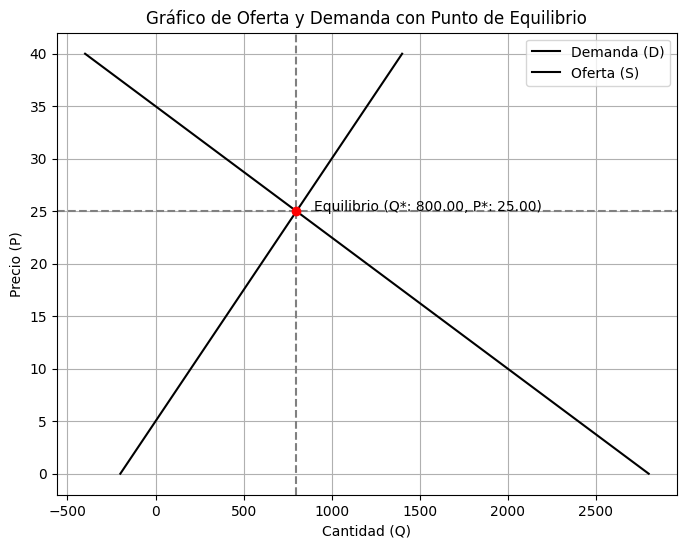

In [240]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# Calcular excedente del consumidor y productor
P_max = 35  # Precio máximo dispuesto a pagar por los consumidores (suposición)
P_min = 5   # Precio mínimo aceptado por los productores (suposición)

# Calcular la cantidad ofrecida a ese precio
cantidad_min = Qs.subs(Px, P_min)
print(f'Cantidad mínima ofrecida a P_min = {P_min}, la cantidad min = {cantidad_min}')

exc_consumidor = (P_max - precio_equilibrio) * cantidad_equilibrio / 2
print(f'Exc C = ((35-25)) * 800) / 2 = {exc_consumidor}')
exc_productor = (precio_equilibrio - P_min) * cantidad_equilibrio / 2
print(f'Exc P = ((25-5) * 800) / 2 = {exc_productor}')

next_line()

print(f'Excedente del Consumidor: {exc_consumidor}')
print(f'Excedente del Productor: {exc_productor}')

# Paso 4: Graficar las curvas de oferta y demanda

# Crear un rango de precios
precios = np.linspace(0, 40, 500)

# Crear las curvas de demanda y oferta en función de los precios
Qd_func = sp.lambdify(Px, Qd, "numpy")
Qs_func = sp.lambdify(Px, Qs, "numpy")

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar la curva de demanda y oferta
plt.plot(Qd_func(precios), precios, label="Demanda (D)", color="black")
plt.plot(Qs_func(precios), precios, label="Oferta (S)", color="black")

# Marcar el punto de equilibrio
plt.scatter([cantidad_equilibrio], [precio_equilibrio], color="red", zorder=5)
plt.text(cantidad_equilibrio + 100, precio_equilibrio, f"Equilibrio (Q*: {cantidad_equilibrio:.2f}, P*: {precio_equilibrio:.2f})", color="black")

# Añadir líneas de referencia para el punto de equilibrio
plt.axvline(x=cantidad_equilibrio, color="gray", linestyle="--")
plt.axhline(y=precio_equilibrio, color="gray", linestyle="--")

# Etiquetas
plt.xlabel("Cantidad (Q)")
plt.ylabel("Precio (P)")
plt.title("Gráfico de Oferta y Demanda con Punto de Equilibrio")

# Añadir leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

# **EJERCICIO 6**. Partiendo del escenario del EJERCICIO 5, establezca lo que ocurre en el mercado si mediante un control de precios el gobierno impone un precio máximo: Pmáx = 15. Bajo este escenario determine:



#### 6.1) El cambio en el excedente del consumidor (ΔEC).

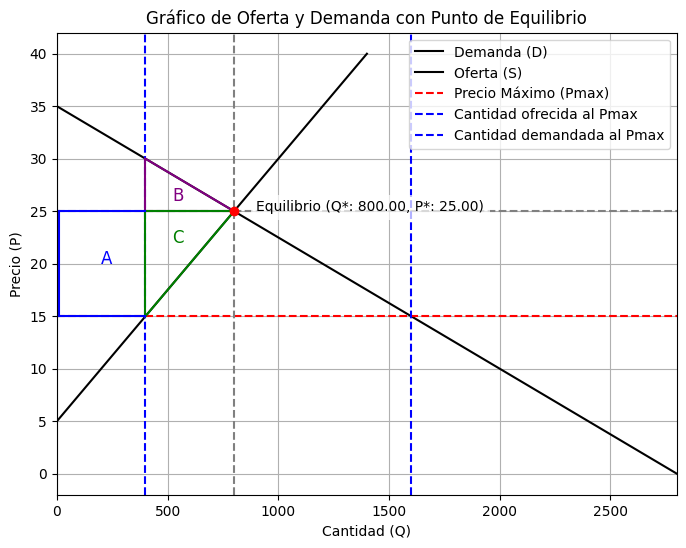

A = (25-15)*400 = 4000.00
B = (b*h) / 2 = (800-400)*(30-25) = 1000.00
C = (b*h) / 2 = ((800-400)*(25-15)) / 2 = 2000.00
ΔEC = -A-B = -4000.00 -1000.00 = -5000.00


In [249]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

Px = sp.symbols('Px')
Qd = 2800 - 80 * Px  # Función de demanda
Qs = -200 + 40 * Px  # Función de oferta

# Definir el precio máximo
P_max = 15  # Precio máximo

# Calcular la cantidad ofrecida y demandada al precio máximo
cantidad_ofrecida = Qs.subs(Px, P_max)
cantidad_demandada = Qd.subs(Px, P_max)

# Paso 4: Graficar las curvas de oferta y demanda

# Crear un rango de precios
precios = np.linspace(0, 40, 500)

# Crear las curvas de demanda y oferta en función de los precios
Qd_func = sp.lambdify(Px, Qd, "numpy")
Qs_func = sp.lambdify(Px, Qs, "numpy")

# Crear el gráfico
plt.figure(figsize=(8, 6))

# Graficar la curva de demanda y oferta
plt.plot(Qd_func(precios), precios, label="Demanda (D)", color="black")
plt.plot(Qs_func(precios), precios, label="Oferta (S)", color="black")

# Añadir línea de precio máximo impuesto por el gobierno
plt.axhline(y=P_max, color="red", linestyle="--", label="Precio Máximo (Pmax)")

# Marcar el punto de equilibrio
plt.scatter([cantidad_equilibrio], [precio_equilibrio], color="red", zorder=5)

# Añadir texto con fondo blanco
plt.text(cantidad_equilibrio + 100, precio_equilibrio, 
         f"Equilibrio (Q*: {cantidad_equilibrio:.2f}, P*: {precio_equilibrio:.2f})", 
         color="black", 
         bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))  # Añadir fondo blanco

# Añadir líneas de referencia para el punto de equilibrio
plt.axvline(x=cantidad_equilibrio, color="gray", linestyle="--")
plt.axhline(y=precio_equilibrio, color="gray", linestyle="--")

# Añadir línea vertical en el punto donde el precio máximo cruza la línea de oferta
plt.axvline(x=cantidad_ofrecida, color="blue", linestyle="--", label="Cantidad ofrecida al Pmax")
plt.axvline(x=cantidad_demandada, color="blue", linestyle="--", label="Cantidad demandada al Pmax")

# Dibujar las líneas del triángulo Excedente de Consumidor (EC)
plt.plot([cantidad_ofrecida, cantidad_ofrecida], [25, 30], color="purple")  # Lado vertical
plt.plot([cantidad_ofrecida, cantidad_equilibrio], [25, 25], color="purple")  # Lado horizontal
plt.plot([cantidad_ofrecida, cantidad_equilibrio], [30, 25], color="purple")  # Hipotenusa

# Añadir el texto "B" en el triángulo
plt.text(cantidad_equilibrio - 280, 26, "B", fontsize=12, color="purple")  # Ajusta la posición según sea necesario

# Dibujar las líneas del triángulo Excedente de Productor (EP)
plt.plot([cantidad_ofrecida, cantidad_ofrecida], [15, 25], color="green")  # Lado vertical
plt.plot([cantidad_ofrecida, cantidad_equilibrio], [25, 25], color="green")  # Lado horizontal
plt.plot([cantidad_ofrecida, cantidad_equilibrio], [15, 25], color="green")  # Hipotenusa

# Añadir el texto "C" en el triángulo
plt.text(cantidad_equilibrio - 280, 22, "C", fontsize=12, color="green")  # Ajusta la posición según sea necesario

# Dibujar las líneas del triángulo Excedente de Productor (EP)
plt.plot([10, 10], [15, 25], color="blue")  # Lado vertical
plt.plot([0, cantidad_ofrecida], [15, 15], color="blue")  # Lado horizontal
plt.plot([0, cantidad_ofrecida], [25, 25], color="blue")  # Hipotenusa

# Añadir el texto "A" en el triángulo
plt.text(200, 20, "A", fontsize=12, color="blue")  # Ajusta la posición según sea necesario

# Etiquetas
plt.xlabel("Cantidad (Q)")
plt.ylabel("Precio (P)")
plt.title("Gráfico de Oferta y Demanda con Punto de Equilibrio")

# Ajustar los límites del eje x para que el mínimo sea 0
plt.xlim(0, np.max(Qd_func(precios)))  # Ajusta según sea necesario para tu rango

# Añadir leyenda y cuadrícula
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

a = (25-15)*cantidad_ofrecida
print(f'A = (25-15)*{cantidad_ofrecida} = {a:.2f}')

b = ((cantidad_equilibrio - cantidad_ofrecida) * (30 - 25)) / 2
print(f'B = (b*h) / 2 = ({cantidad_equilibrio}-{cantidad_ofrecida})*(30-25) = {b:.2f}')

c = ((cantidad_equilibrio - cantidad_ofrecida) * (25-15)) / 2
print(f'C = (b*h) / 2 = (({cantidad_equilibrio}-{cantidad_ofrecida})*(25-15)) / 2 = {c:.2f}')

cambio_ec = -a-b
print(f'ΔEC = -A-B = -{a:.2f} -{b:.2f} = {cambio_ec:.2f}')

cambio_ec = -a-b
print(f'ΔEC = -A-B = -{a:.2f} -{b:.2f} = {cambio_ec:.2f}') 

#### 6.2) El cambio en el excedente del productor (ΔEP).

In [ ]:
cambio_ec = -a-c

#### 6.3) El cambio en el excedente total conjunto (ΔET).

#### 6.4) Calcule los excedentes del consumidor (EC) y del productor (EP) que resultan del control de precios.

En cada uno de estos casos indique en la gráfica siguiente las áreas relacionadas (A, B y C) y las explicaciones correspondientes de los efectos de cada una sobre los excedentes.

Nota: ver figura 9.2 y ejemplo 9.1 del libro.